<a href="https://colab.research.google.com/github/ashishkumargoyal/-ashish_simple_multiple-linear-regression-_concrete-data.i/blob/main/Ashish_decision__tree_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import some data to play with
df = pd.read_csv('/content/Obesity Classification.csv')

In [4]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [24]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [25]:
df['Label'].value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [6]:
df['Label'].value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [7]:
df['Label_encoded'] = df['Label'].map({
    'Underweight': 1,
    'Normal Weight': 0,
    'Overweight': 2,
    'Obese': 3
}) # remove the extra lines that redefine 'Overweight' and Obese

In [8]:
df['Label_encoded'].value_counts()

,count
Label_encoded,
1,47
0,29
2,20
3,12


In [9]:
print("\nCounts in 'Label_encoded' column:")
print(df['Label_encoded'].value_counts())


Counts in 'Label_encoded' column:
Label_encoded
1    47
0    29
2    20
3    12
Name: count, dtype: int64


In [10]:
df['Label_encoded'].value_counts()

,count
Label_encoded,
1,47
0,29
2,20
3,12


In [33]:
 #Define feature variables x and y
# Drop the original 'Label' and the encoded label to avoid data leakage
x = df.drop(['Label', 'Label_encoded'], axis=1) # Pass a list of column names to drop
y = df['Label_encoded']

In [34]:
x

,ID,Age,Gender,Height,Weight,BMI
0,1,25,1,175,80,25.3
1,2,30,0,160,60,22.5
2,3,35,1,180,90,27.3
3,4,40,0,150,50,20.0
4,5,45,1,190,100,31.2
...,...,...,...,...,...,...
103,106,11,1,175,10,3.9
104,107,16,0,160,10,3.9
105,108,21,1,180,15,5.6
106,109,26,0,150,15,5.6


In [35]:
y

,Label_encoded
0,0
1,0
2,2
3,1
4,3
...,...
103,1
104,1
105,1
106,1


In [36]:
df['Label_encoded'].unique()

array([0, 2, 1, 3])

In [37]:
df.Label_encoded.value_counts()

,count
Label_encoded,
1,47
0,29
2,20
3,12


In [30]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label',
       'Label_encoded'],
      dtype='object')

In [17]:
colnames = list(df.columns)
print(colnames)

['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label', 'Label_encoded']


In [38]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [28]:
df.shape

(108, 8)

In [39]:
x_train

,ID,Age,Gender,Height,Weight,BMI
40,43,27,1,180,75,24.2
54,57,97,1,200,95,27.0
23,25,83,0,150,50,20.0
9,10,70,0,120,20,10.0
26,28,98,1,200,110,34.2
...,...,...,...,...,...,...
56,59,107,1,210,105,28.9
37,40,64,0,120,95,29.1
7,8,60,0,130,30,13.3
91,94,53,1,210,55,21.2


In [40]:
y_train

,Label_encoded
40,0
54,2
23,1
9,1
26,3
...,...
56,3
37,2
7,1
91,0


Building Decision Tree Classifier using Entropy Criteria

In [52]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

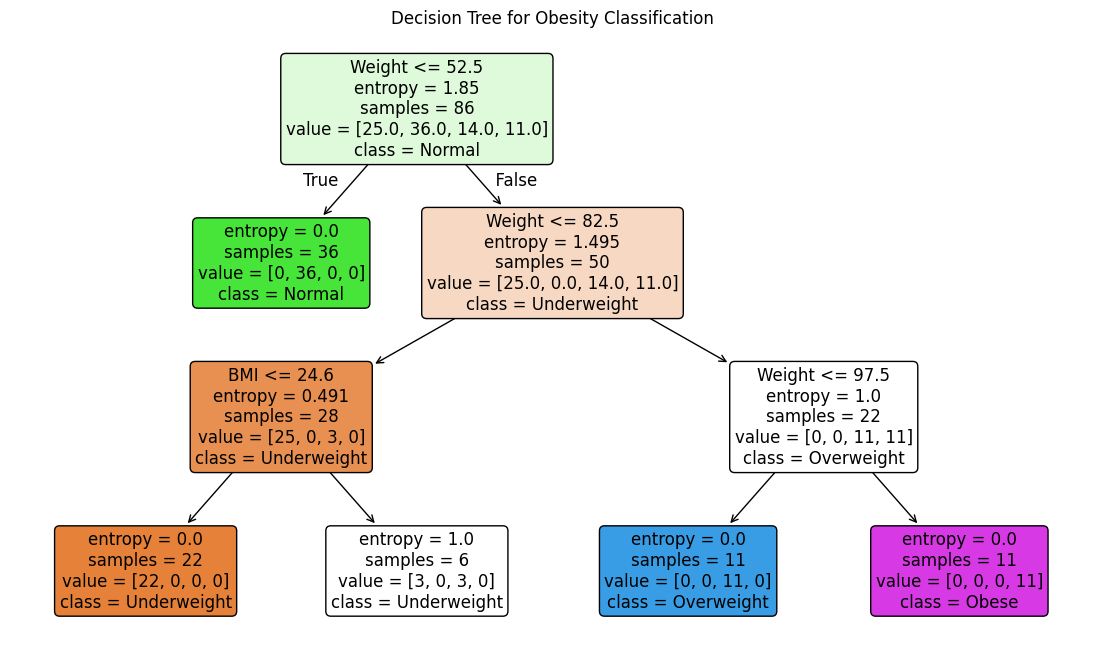

In [53]:
#import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree


# Assuming 'x' contains your feature data
plt.figure(figsize=(14, 8))
plot_tree(model,
          feature_names=x.columns,
          class_names=['Underweight', 'Normal', 'Overweight', 'Obese'],
          filled=True, rounded=True)
plt.title("Decision Tree for Obesity Classification")
plt.show()